# <h1><center>Fundamentals of Data Analysis Project</center></h1>

The aim of this project is to analyse the data set provided based on wind turbine power output and wind speed, and perform simple linear regression on the data set in order to accurately predict wind turbine power output from wind speed values. The project will provide two methods of producing best fit lines for the data set, and return an R2 value for each which will be used to asses their accuracy. The coefficient of determination, denoted as R2, tells you the amount of variation in y which can be explained by the dependence on x using the particular regression model. Larger R2 indicates a better fit and means that the model can better explain the variation of the output with different inputs(Stojiljković, 2020). Method 1 will perform linear regression on the data set using numpy's polyfit function, while the second method will use the sklearn package. Pythons polyfit function is a least squares polynomial fit function which accepts the data set and a polynomial function of any degree (specified by the user), and returns an array of coefficients that minimizes the squared error (Sarkar, 2017). The Sklearn package focuses heavily on interface consistency, meaning that it tries to unify access to different features and algorithms using the same methods such as.fit, .transform, .fit_transform,and .predict (Zero, 2020). A simple linear regression will be carried out on the data set, however a more effective model of regression may be used for analyses later in the paper.

Firstly, simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables. One variable, denoted x, is regarded as the predictor, or independent variable, while the other variable, denoted y, is regarded as the outcome, or dependent variable (PennState, 2018). Linear regression models use a straight line, while logistic and nonlinear regression models use a curved line. Regression allows you to estimate how a dependent variable changes as the independent variable changes (Bevans, 2020). We will see as we perform a basic analyses on the data set that perhaps a linear regression might not be the most accurate fit. 

All straight lines can be expressed in the form:

y = β0 +β1x

Where β0 is the y-intercept of the regression line, and β1 is the slope.

The simple linear regression model is represented by:

y = β0 +β1x+ε

The linear regression model contains an error term that is represented by ε. The error term is used to account for the variability in y that cannot be explained by the linear relationship between x and y. If ε were not present, that would mean that knowing x would provide enough information to determine the value of y (Devault, 2020).

***
## <h1><center> Method 1</center></h1>

The numpy.polyfit function can fit any data to a specified degree polynomial by minimizing the least square error method, returning a vector of coefficients. The least square error method is the most common cost function for fitting linear models (Elena, 2016). The beauty of this function, and method of producing best fit lines, is in its simplicity. We start the project by importing any library that may be needed throughout. 

In [40]:
# import all libraries that may be needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
%matplotlib inline
# plot style
plt.style.use("ggplot")

# Bigger plots
plt.rcParams["figure.figsize"] = (18,10)

Next, we will import the data set using pandas.read_csv function and give it the name df. The two variables, speed and power, are selected using the iloc method and are given the name x and y respectively. The data frame is then printed as output.

In [41]:
# import the data set
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
# x = -1 is used to specify the entire dataset except for the last column (speed)
# y = 1 is used to specify the last column (power)
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


A simple description of the variables is acquired using the .describe function. All essential information on the variables can be seen in the output cell. 

In [42]:
# description of variables
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The two variables are then plotted to give a visual representation of their dispersion and possible relationship with each other. Size specifications are defined using figsize.

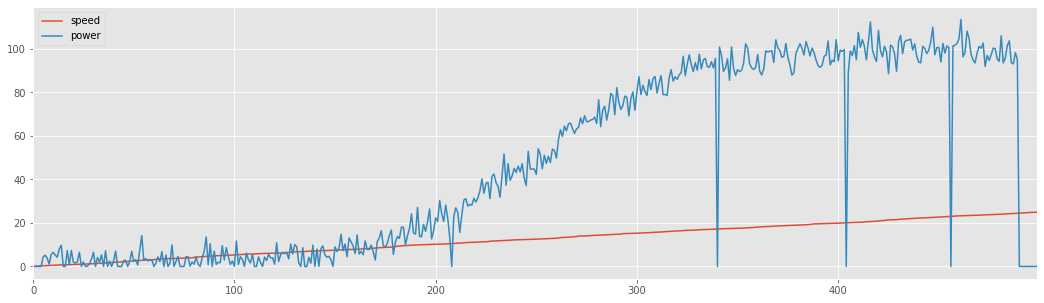

In [43]:
# plot the 2 variables (speed and power)
df.plot(figsize=(18,5));

A simple check of the data quality is important, and from the output of the .isnull command we can see that the data is clean. 

In [44]:
# check if data set is clean (no null values)
df.isnull().values.any()

False

Histograms are produced to visualise the distributions of the variables.

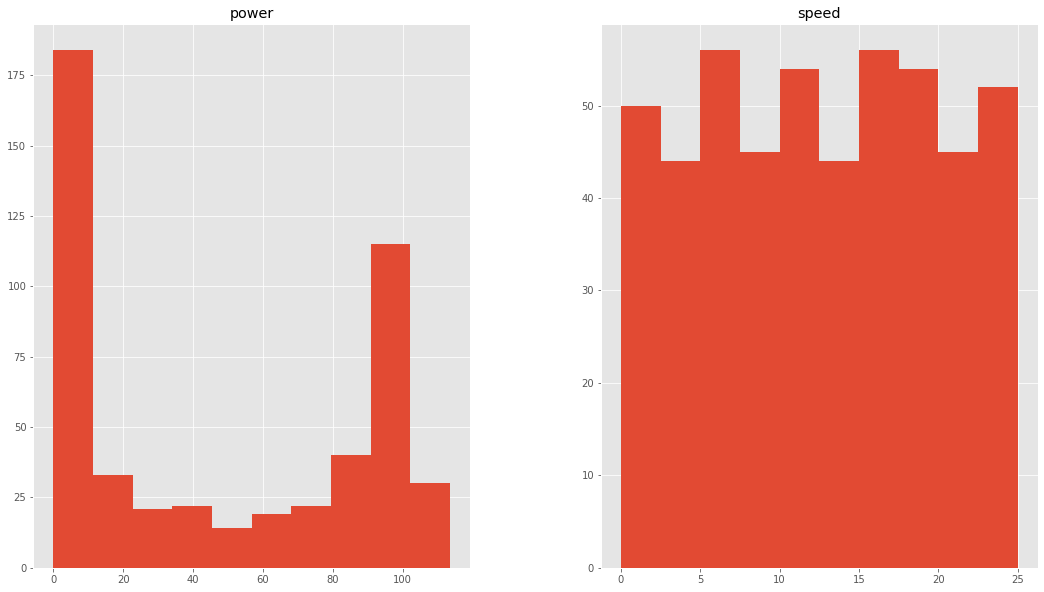

In [45]:
# histogram of power and speed distributions
df.hist();

In [46]:
# get first 5 figures of variables
df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


A scatter plot is produced of the variables, with each axis named and a heading above. This was important as it showed the distribution shape of the data set. From this plot you can clearly see that a straight line simple linear regression might not be the most suitable, or accurate, regression. However, we continue with the linear regression and will eventually calculate an R2 value to asses its accuracy.

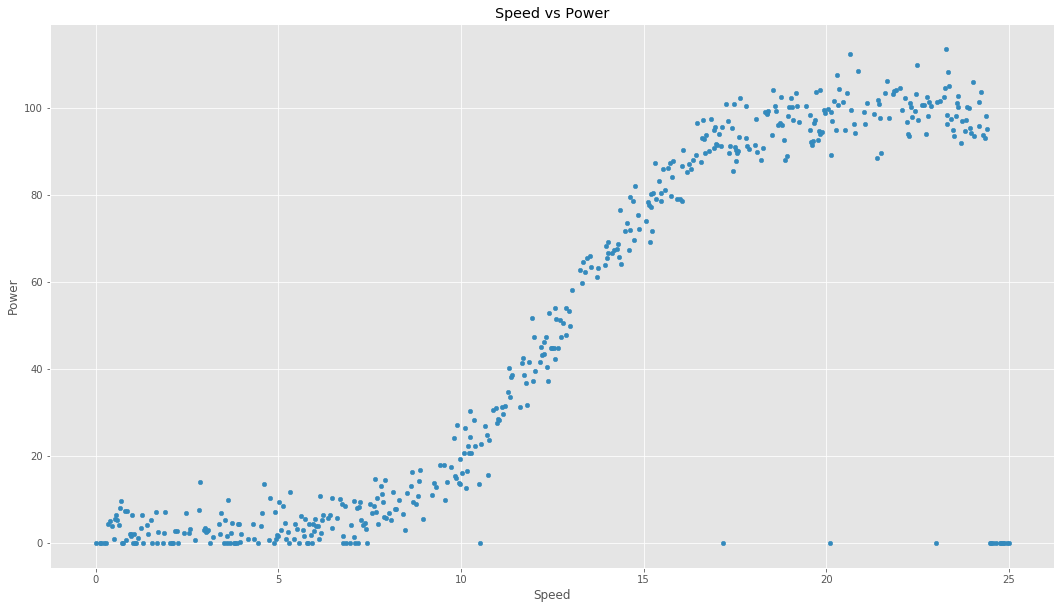

In [47]:
# plot speed vs power, naming x and y axis
df.plot(kind='scatter', x='speed', y='power', style='o')
plt.title('Speed vs Power')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show();

A box plot is used as another visual representation of the two variables, and the .corr function below shows the strong positive correlation between the variables, which could already be seen from the various plots.

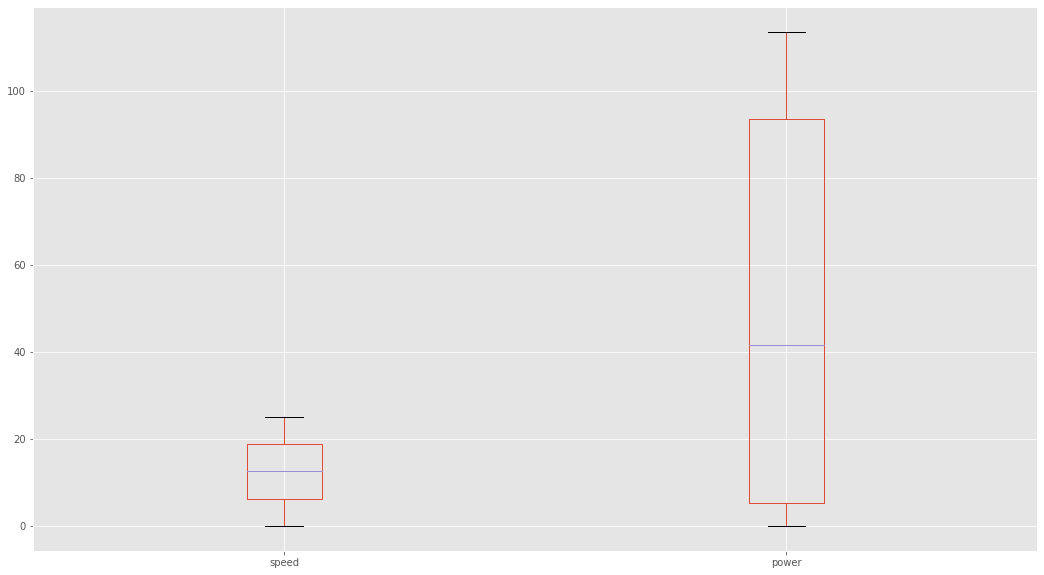

In [48]:
# box plot to show the difference in dispersion
df.plot(kind='box')
plt.show()

In [49]:
# highlighting the strong positive correlation
df.corr()

,speed,power
speed,1.000000,0.853778
power,0.853778,1.000000


Although the above steps were not absolutely neccessary for carrying out a simple linear regression, it is beneficial to do basic analyses on the data before carrying out more in depth analytical tasks. In the next step we use numpys polyfit function, which will return coefficients that minimizes the squared error. The function needs three parameters: the defined input and output variables (x1, y1) and an integer: 1. The integer defines the degree of the polynomial you want to fit. Later in the project we will perform a polynomial regression in which we will change the integer. This method was selected for its simplicity, accuracy and time efficiency.  

In [50]:
# Turn the data frame into a 1D array using numpy.array on variables.
# Rename as x1 and y1
x1 = np.array(df['speed'])
y1 = np.array(df['power'])
# Simply enter variables into the numpy polyfit function, and name 'coeffs'
coeffs = np.polyfit(x1,y1,1)
coeffs

array([  4.91759567, -13.89990263])

Once the polyfit function has been run, we use the poly1d() method to estimate unknown values. We name this function  'predict', and it uses the coeffs calculated in the polyfit function above to predict values based on values which are input by the user.    

In [51]:
# use numpy poly1d as a prediction function
predict = np.poly1d(coeffs)

Based on the predict function below, a wind speed of 24 will generate 104.1 units of power. If we return to the graphs above, we can see that this looks like a pretty accurate prediction. But how accurate?

In [52]:
predict([[24]])

array([[104.12239334]])

We will use a function imported from the sklearn.metrics library to calculate the R2 value of the function. The function is run by inputting the y1 variable and a predict(x1) variable into the function. When the function is run we get a figure of 0.7289. This is the R2 value. This model enables us to calculate power generated based on a certain level of wind speed, with 72% accuracy. An R2 value of 1 would mean that the function is 100% accurate. This funciton created using numpy polyfit is effective at predicting y values based on x, but it could certainly be improved.  

In [53]:
# import r2_score function from sklearn.metrics
from sklearn.metrics import r2_score
r2_score(y1, predict(x1))

0.7289360258564073

Finally, below we will plot the original data set, in scatter plot form, along with the best fit line which is calculated using the formula y = β0 +β1x, with the necessary input data recieved from the output of the coeffs function above. The axis are labelled, a legend added and the best fit line is clearly visible.

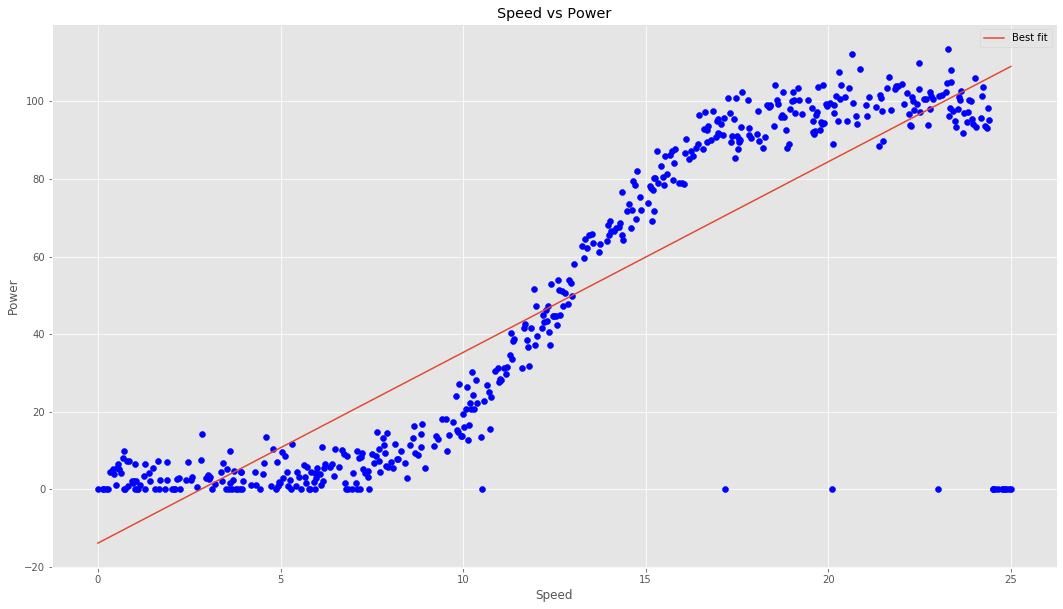

In [54]:
# create scatter plot of original data
plt.scatter(x, y, color='blue')
# plot best fit line based on coeffs 
plt.plot(x1, coeffs[0] * x1 + coeffs[1], '-', label='Best fit')
# Add labels and title
plt.legend();
plt.title('Speed vs Power')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

***
## <h1><center> Method 2</center></h1>

The package scikit-learn, or sklearn, is a widely used Python library for machine learning, built on top of NumPy and some other packages. It provides the means for preprocessing data, reducing dimensionality, implementing regression, classification, clustering, and more (Stojiljković, 2020). The LinearRegression function imported from the sklearn.linear_model library fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset.


We start by importing the train_test_split function from  sklearn.model_selection. The majority of libraries needed for the project were imported in the first cell of code, however some additional functions are needed for the sklearn linear regression. The first step is to split the data into training and test sets. We'll do this by using sklearn's train_test_split() method, where we split 80% of the data to training set while 20% of the data to test set. The test_size variable is where we specify the proportion of test set (Robinson, 2020).

In [55]:
# split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Once the data has been split into test and train sets, the next step is to import the LinearRegression function and train the algorithm. The regression is given the name 'regressor' and the .fit method is used to fit our training data. Once this step is carried out we can use the function to predict values, calculate the intercept and slope which enables us to plot the best fit line on the original data set. 

In [56]:
# set up the linear regression and fit the training data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We use the .predict() method to predict power values based on speed input. The y_pred is a numpy array that contains all the predicted values for the input values in the X_test array. First we will select a value for speed and allow the function to predict the power as output.

In [57]:
# predicting y data based on x test data (predicting power based on speed input)
y_pred = regressor.predict([[13]])
y_pred

array([50.03703629])

According to the function above, at a wind speed of 13, the power created will be 50.037. Looking at the scatter plots of the data set, this figure looks accurate. But how accurate is the function at prediction? We will use the same function as was used in Method 1 above, sklearn.metrics r2_score, to find out. But before this function is run, we will show how we can create a data frame of actual vs predicted values to compare the actual output values for X_test with the predicted values. The code for this task can be seen below.

In [58]:
# predicting y data based on X_test data set
y_pred = regressor.predict(X_test)

In [59]:
# creating a data frame with actual and predicted data based power data, for comparison
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,7.060,10.408605
1,51.149,48.632051
2,71.763,57.326318
3,99.357,96.161691
4,113.556,100.327694
...,...,...
95,96.058,77.911562
96,3.578,1.097515
97,93.931,95.304992
98,0.000,1.709442


As stated in the introduction of the project, all straight lines can be expressed in the form: y = β0 +β1x where β0 is the y-intercept of the regression line, and β1 is the slope. To see the value of the intercept and slope calculated by the linear regression algorithm for the dataset we can use the .coef_ and .intercept_ functions below. 

In [60]:
# Calculate the coefficient
print(regressor.coef_)

[4.89542079]


In [61]:
# Calculate the Intercept
print(regressor.intercept_)

-13.603433993820211


As stated above, we will now use the r2_score function to calculate the functions accuracy. As you can see in the output cell, the R2 figure for this function is 0.7066. This function enables us to calculate power generated based on a certain level of wind speed, with 71% accuracy. This can certainly be improved.

In [62]:
# Calculate the r2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7066904808136409

Finally, we plot the scatter plot of the original data set, along with the best fine line calculated using the sklearn linear regression package. Headings, labels and legend are all included.

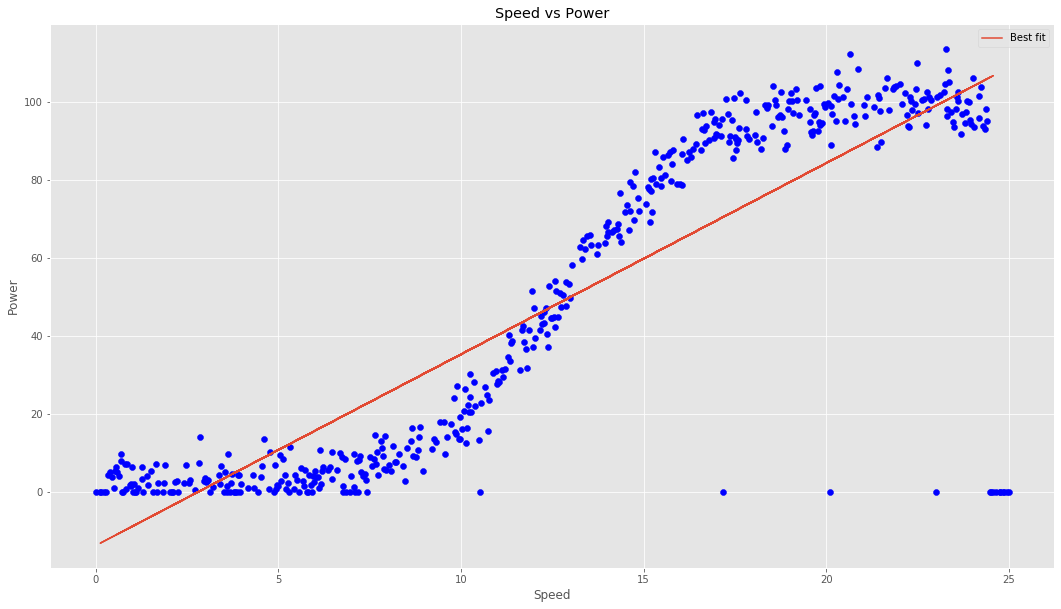

In [63]:
# plot speed vs power, naming x and y axis
# plot the best fit line
plt.scatter(x, y, color='blue')
plt.plot(X_test, y_pred,'-', label='Best fit')
plt.title('Speed vs Power')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.legend();
plt.show()

This concludes the simple linear regression section of the project. The task was completed using two methods, sklearn's Linear Regression and numpy's polyfit functions, which resulted in best fit lines and prediction functions with 72% and 71% accuracy. As was stated earlier in the project, during the initial data analyses stage, perhaps there is a better suited regression which would result in a significantly better prediction function. The two variables in the data set are strongly correlated but the most accurate best fit line does not look linear. Judging by the shape of the data on the scatter plot, performing a polynomial linear regression on the data set could improve prediction accuracy significantly. Luckily, once the code for the simple linear regression was created above, it is very easy to edit the code to perform a polynomial regression.

***

#  <h1><center>Polynomial Regression</center></h1>

Polynomial Regression is a special case of Linear Regression where we fit the polynomial equation on the data with a curvilinear relationship between the dependent and independent variables (Abhigyan, 2020). Polynomial provides the best approximation of the relationship between the dependent and independent variable and fits a wide range of curvature, however the presence of one or two outliers in the data can seriously affect the results of the nonlinear analysis (Pant, 2019). We will potentially see this issue when the best fit curve is created and added to the scatter plot of the original data set. Both the numpy polyfit function and sklearn's PolynomialFeatures function are used in this regression, which are both nearly identical to the functions in both methods in the linear regression section. The main difference is the degree specification within the functions.

A polynomial is a function that takes the form:

Y=β0+β1X+β2X2+…+βhXh

where h is called the degree of the polynomial, y is the dependent variable and the betas are the coefficient for different nth powers of the independent variable x starting from 0 to n (Savaram, 2019).

As we increase the degree in the model, it tends to increase the performance of the model. However, increasing the degree of the model also increases the risk of over-fitting and under-fitting the data. In this section of the project the curve that we will be fitting is cubic in nature. The first method is completed using sklearn, while the second method uses numpy's polyfit function. We will plot the best fit curve, and calculate the R2 values, which can be compared to the R2 values in section 1 (linear regression) to decide on the most accurate method.

##  <h1><center> Method 1</center></h1>

Completing polynomial regression with scikit-learn is very similar to linear regression. There is only one extra step: we need to transform the array of inputs to include non-linear terms. We begin the process by importing any necessary libraries for carrying out the project. The variables and plot styles are specified, and a scatter plot of the data set is created, the exact same steps as in the linear regression models above.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
%matplotlib inline

# plot style
plt.style.use("ggplot")

# Bigger plots
plt.rcParams["figure.figsize"] = (18,10)

In [65]:
# import the data set
df1 = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
# x = the entire dataset except for the last column
# y = the last column
x = df1.iloc[:, :-1].values
y = df1.iloc[:, 1].values

df1

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


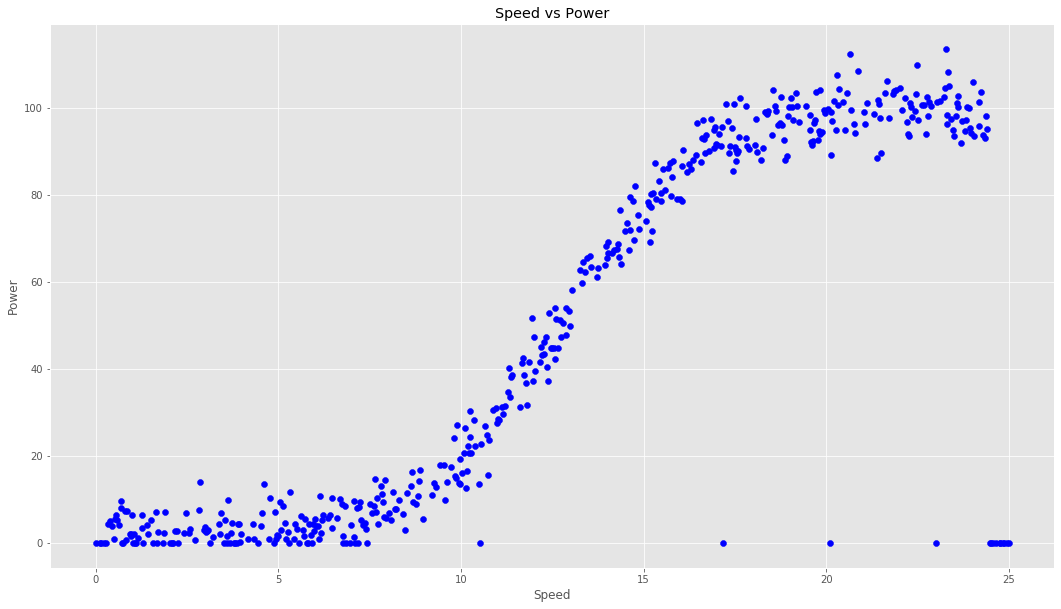

In [66]:
# plot speed vs power, naming x and y axis
plt.scatter(x, y, color='blue')
plt.title('Speed vs Power')
plt.xlabel('Speed')
plt.ylabel('Power');

The PolynomialFeatures function, imported from sklearn.preprocessing, generates a new matrix with all polynomial combinations of features with given degree. We select a degree of 3, to add a curve which is cubic in nature. We then use the poly.fit_transform to fit the data of x, then transform it. 

In [67]:
# import PolynomialFeatures from sklearn
from sklearn.preprocessing import PolynomialFeatures

In [68]:
# fit a cubic curve (degree=3) 
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

We fit the transformed x_poly data above along with the original y data, and then create a variable y_poly_pred which uses the .predict function to predict y values based on x input. We use these y_poly_pred to fit the best fit curve on the scatter plot below.

In [69]:
# set up the regression and fit the x_poly and y data
# set up the prediction function
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

Scatter plot of original data, including the best fit curve produced using original x data with y_poly_pred data. Labels, title and legend included.

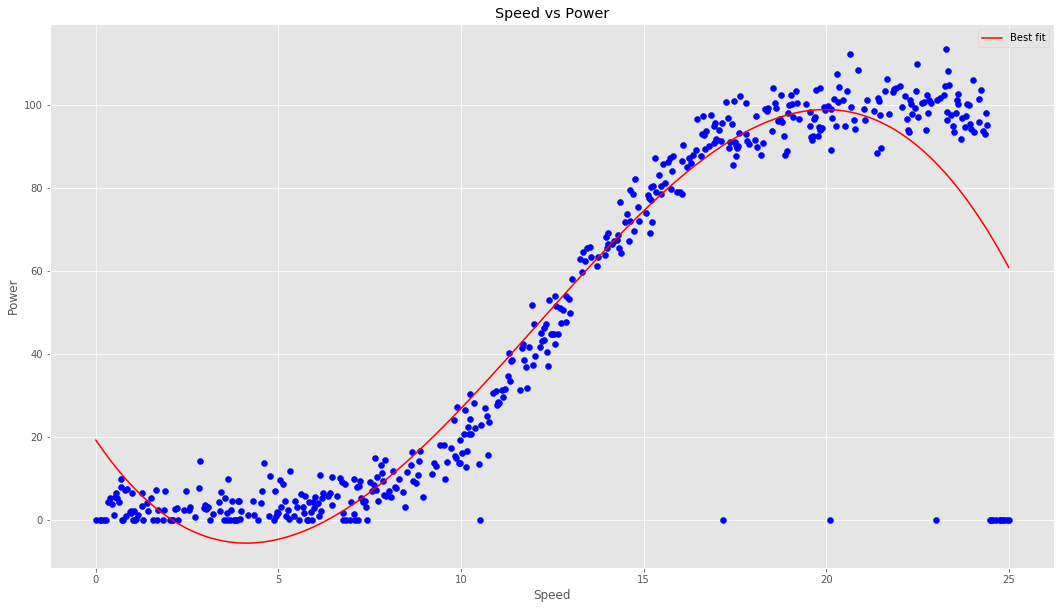

In [70]:
# plot speed vs power, naming x and y axis
# plot the new cubic best fit line
plt.scatter(x, y, color='blue')
plt.plot(x, y_poly_pred, color='red', label='Best fit')
plt.title('Speed vs Power')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.legend()
plt.show()


The R2 value is then calculated using the r2_score function imported from the sklearn.metrics library. This is the same process as the two models in the linear regression section. A R2 score of 0.8796 shows a significant improvement in accuracy of the function compared to the linear regression models.

In [71]:
# Calculate the r2 value in order to compare accuracy vs linear model
from sklearn.metrics import r2_score
r2 = r2_score(y,y_poly_pred)
print(r2)

0.8796883953739738


***

##  <h1><center> Method 2</center></h1>

The final method in the project will use numpy's polyfit function to perform a polynomial regression on the data set. This is a very simple, and time efficient, method of producing a cubic best fit curve to the data set. All libraries needed are imported and variables specified before the best fit process begins.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
%matplotlib inline

# plot style
plt.style.use("ggplot")

# Bigger plots
plt.rcParams["figure.figsize"] = (18,10)

In [73]:
df1 = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

In [74]:
x2 = np.array(df1['speed'])
y2 = np.array(df1['power'])

In the next step we use the same functions as were used in the linear regression, however instead of a degree of 1 in the linear regression, we use a degree of 3 for the polynomial regression. Numpy's Polyfit function is used to return a vector of coefficients, and the poly1d() method is used to estimate unknown values. This function is named 'model', and it uses the coeffs calculated in the polyfit function to predict values based on values which are input to the function.

In [75]:
degree = 3
speed = np.polyfit(x2, y2, degree)
model = np.poly1d(speed)

In [76]:
# Predict the power value when speed is 20.
model([[20]])

array([[98.93299718]])

In [77]:
# calculate R2 value to asses accuracy of model
from sklearn.metrics import r2_score
r2_score(y2, model(x2))

0.8796883953739737

When a wind speed of 20 is entered in our model, it returns a power of 98.93, which looks accurate based on the scatter plot below. We use the R2_score function to calculate the accuracy of the model, which gives us a figure of 0.8796. This figure is nearly identical to the sklearn polynomial regression method above. Both significantly more accurate than the linear regression models. 

We plot the best fit curve on the original scatter plot below.

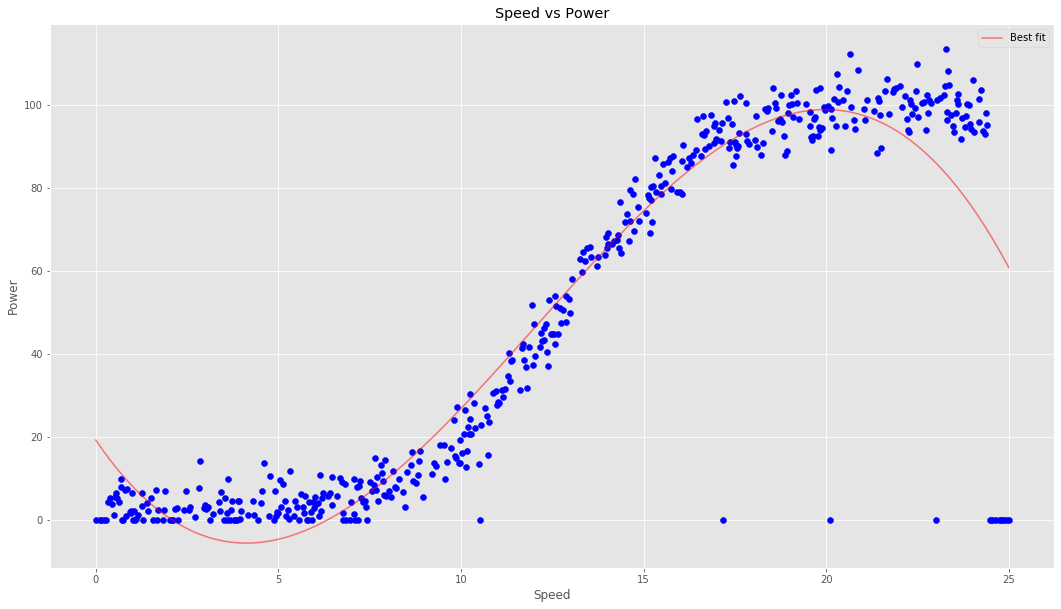

In [78]:
plt.scatter(x, y, color='blue')
plt.plot(x2, model(x2),color = 'r',alpha = 0.5, label = 'Best fit')
plt.legend();
plt.title('Speed vs Power')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

***
## <h1><center> Conclusion </center></h1>

This project provided a data set based on wind turbine power output and wind speed, and required us to perform simple linear regression on the data set in order to accurately pre- dict wind turbine power output from wind speed values. Two methods of completing the task were carried out, one which used numpy's polyfit function and another which used sklearn linear regression. Both models worked to make predictions, but their accuracy could definetly be improved. R2 values for the linear regression models were 0.7289, for the polyfit function, and 0.7066 for the sklearn function. Numpy's polyfit function outperformed sklearn in terms of ease of use, time efficiency and accuracy. However, when we displayed a scatter plot of the data set in the analyses section of the project, it was apparent that a linear regression was not going to be the most accurate regression to perform. A polynomial regression was then completed, again using numpy polyfit and sklearn. We found these models significantly more accurate than the linear regression. A degree of 3 was selected in both functions, in order to minimise the risk of over-fitting and under-fitting the data. Cubic curves are added to the original scatter plot and an R2 score of 0.8796 was calculated for both. It is clear to see that a polynomial regression is a significantly more accurate model when predicting data for this particular data set, outperforming linear regression models by 15% in terms of prediction accuracy. 

***
#  <h1><center> Bibliography </center></h1>

Abhigyan (2020) 'Understanding Polynomial Regression' Medium. Available at: https://medium.com/analytics-vidhya/understanding-polynomial-regression-5ac25b970e18 Accessed on: 29/12/2020.

Bevans, R. (2020) 'An introduction to simple linear regression' Scribbr. Available at: https://www.scribbr.com/statistics/simple-linear-regression/ Accessed on: 02/01/2021.

Devault, G. (2020) 'What A Simple Linear Regression Model Is and How It Works' The Balance Small Business. Available at: https://www.thebalancesmb.com/what-is-simple-linear-regression-2296697 Accessed on: 03/01/2021.

Elena, N/A (2016) 'Two Ways to Perform Linear Regression in Python with Numpy and Scikit-Learn' Codefying. Available at: https://codefying.com/2016/08/18/two-ways-to-perform-linear-regression-in-python-with-numpy-ans-sk-learn/ Accessed on: 01/01/2021.

Mester, T. (2020) 'Linear Regression in Python using numpy + polyfit (with code base)' Data 36. Available at: https://data36.com/linear-regression-in-python-numpy-polyfit/ Accessed on: 03/01/2021.

Pant, A. (2019) 'Introduction to Linear Regression and Polynomial Regression' Towards Data Science. Available at: https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb Accessed on: 03/01/2021.

PennState (2018) 'What is Simple Linear Regression?' Applied Regression Analysis. Available at: https://online.stat.psu.edu/stat462/node/91/ Accessed on: 28/12/2020.

Robinson, S. (2020) 'Linear Regression in Python with Scikit-Learn' Stack Abuse. Available at: https://stackabuse.com/linear-regression-in-python-with-scikit-learn/ Accessed on: 04/01/2021.

Sarkar, Tirthajyoti (2017) 'Data science with Python: 8 ways to do linear regression and measure their speed' Free Code Camp. Available at: https://www.freecodecamp.org/news/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b/ Accessed on: 26/12/2020.

Savaram, R. (2019) 'Polynomial Regression' Mind Majix. Available at: https://mindmajix.com/polynomial-regression Accessed on: 04/01/2021.

Stojiljković, M. (2020) 'Linear Regression in Python' Real Python. Available at: https://realpython.com/linear-regression-in-python/ Accessed on: 21/12/2020.

Zero, Oleg (2020) 'Polynomial Regression — which python package to use?' Towards Data Science. Available at: https://towardsdatascience.com/polynomial-regression-which-python-package-to-use-78a09b0ac87b Accessed on: 28/12/2020.